# Classification with Logistic Regression, KNN, SVM, Decision Tree, and Random Forest
### Census Income (Adult) Dataset

## 1. Introduction

In this notebook, we will build and compare **five different classification algorithms** on the **Census Income (Adult) dataset**.  
This dataset contains demographic and work-related information about individuals, and our goal is to predict whether a person earns:

- **`<=50K`** (less than or equal to 50,000 USD annually)  
- **`>50K`** (more than 50,000 USD annually)  

This is a **binary classification task** with a mix of numerical and categorical features.


### Algorithms We Will Implement
We will not just stop at Logistic Regression. Instead, we will implement and compare **five algorithms**:

1. **Logistic Regression**  
   - A linear classifier that models the probability of belonging to a class.  
   - Simple, fast, and interpretable.  

2. **K-Nearest Neighbors (KNN)**  
   - A distance-based method that classifies a point based on its nearest neighbors.  
   - We will explore **Euclidean** and **Manhattan** distances, and discuss the **effect of k** on the bias–variance tradeoff.  

3. **Support Vector Machines (SVMs)**  
   - A **large margin classifier** that separates classes with the maximum margin.  
   - We will also use the **kernel trick** for nonlinear boundaries.  

4. **Decision Tree Classifier**  
   - A flowchart-like model that splits data into regions.  
   - Very interpretable but prone to overfitting if not regularized.  

5. **Random Forest Classifier**  
   - An **ensemble** of decision trees trained on random subsets of data and features.  
   - Uses **bagging** to reduce variance and improve generalization.  
   - Provides **feature importance** for interpretability.  

---

### What You Will Learn
By the end of this notebook, you will understand:  
- The **full ML workflow**: data preprocessing → model training → evaluation → comparison.  
- How different algorithms behave on the same dataset.  
- The trade-offs between simplicity, interpretability, and accuracy.  




## 2. Libraries & Setup

Before we start coding, let’s talk about the main Python libraries we will use:

- **pandas**: For data manipulation and analysis. We will use it to load the dataset, explore it, and clean it.  
- **numpy**: For numerical computations, arrays, and mathematical operations (e.g., distance calculations for KNN).  
- **matplotlib** & **seaborn**: For data visualization (histograms, bar plots, heatmaps, etc.), which will help us understand the dataset better.  
- **scikit-learn (sklearn)**: The main Machine Learning library in Python. It provides:
  - Tools for **preprocessing** (scaling, encoding, splitting).  
  - Implementations of ML models (Logistic Regression, KNN, SVM, Decision Trees, Random Forest).  
  - Evaluation metrics (accuracy, precision, recall, F1-score, confusion matrix).  

We will import each of these libraries so we can use them throughout the notebook.


## 2. Importing all the libraries

In [ ]:
# Data manipulation
import pandas as pd  # for working with tabular data
import numpy as np   # for numerical operations

# Visualization
import matplotlib.pyplot as plt   # for plotting basic graphs
import seaborn as sns             # for more advanced and prettier visualizations

# Machine Learning (from scikit-learn)
from sklearn.model_selection import train_test_split     # for splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # for scaling numeric data and encoding categorical data
from sklearn.compose import ColumnTransformer            # for applying different preprocessing steps to different columns
from sklearn.pipeline import Pipeline                    # for building workflows that combine preprocessing + models

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display settings for pandas
pd.set_option("display.max_columns", None)  # Show all columns when viewing a DataFrame


## 3. Dataset Source & Loading

We will use the **Adult Census Income dataset** from Kaggle.  
This dataset contains demographic and employment information for individuals, with the goal of predicting whether their annual income is:

- `<=50K`
- `>50K`

---

### Why Kaggle?
Kaggle is one of the most popular platforms for datasets and competitions. Using Kaggle’s API, we can directly download datasets into our Colab environment instead of manually uploading files.

---

### Steps to Access Kaggle Dataset
1. Go to your **Kaggle account settings**.  
2. Scroll down to **API** and click **"Create New API Token"**.  
3. This will download a file called `kaggle.json` which contains your credentials.  
4. Upload this file into Colab so that the Kaggle API can authenticate you.  

After authentication, we will download the dataset:  
-> [Adult Census Income Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/adult-census-income)  

Once downloaded, we will extract the files and load them into a **pandas DataFrame** for further exploration.


In [ ]:
from google.colab import files

# Step 1: Upload kaggle.json (downloaded from Kaggle account)
# A file chooser will open; select your kaggle.json file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os
import zipfile

# Step 2: Move kaggle.json to the correct location
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Step 3: Set permissions (very important, otherwise Kaggle will not accept the file)
!chmod 600 /root/.kaggle/kaggle.json

# Step 4: Download the dataset from Kaggle
!kaggle datasets download -d uciml/adult-census-income

# Step 5: Unzip the dataset
with zipfile.ZipFile("adult-census-income.zip", "r") as zip_ref:
    zip_ref.extractall("census_income")

print(" Dataset downloaded and extracted successfully!")


Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 887MB/s]
 Dataset downloaded and extracted successfully!


In [ ]:
# Step 6: Load dataset into pandas DataFrame
df = pd.read_csv("census_income/adult.csv")

# Preview the first 5 rows
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## 4. Exploratory Data Analysis (EDA)

Before we jump into machine learning models, we need to **understand our dataset**.  
This step is called **Exploratory Data Analysis (EDA)**.

Why is EDA important?  
- It helps us understand the **shape and structure** of the dataset.  
- We can detect **missing values, outliers, and inconsistencies**.  
- We can see how features are distributed (numeric vs categorical).  
- We can explore **relationships between features and the target variable**.  

In this section, we will:
1. Look at dataset size, columns, and data types.  
2. Summarize categorical and numerical features.  
3. Visualize distributions of variables.  
4. Check for missing values and anomalies.  
5. Analyze the target variable distribution (income class).  


## Basic Dataset Overview

In [ ]:
# Shape of the dataset
print("Dataset shape (rows, columns):", df.shape)

# Info: column names, data types, non-null counts
print("\nDataset info:")
print(df.info())

# Check missing values (actual NaNs)
print("\nMissing values per column:")
print(df.isnull().sum())

# Count how many cells have the string " ?" (Kaggle version uses this for missing categorical values)
print("\nMissing (encoded as '?') values per column:")
for col in df.columns:
    print(f"{col}: {(df[col] == ' ?').sum()}")

# Summary statistics of numerical columns
print("\nSummary statistics of numerical features:")
display(df.describe())


Dataset shape (rows, columns): (32561, 15)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Missing values per column:
ag

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Preview Data

In [ ]:
# Look at the first 10 rows
df.head(10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols


Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

## Unique Values in Categorical Features

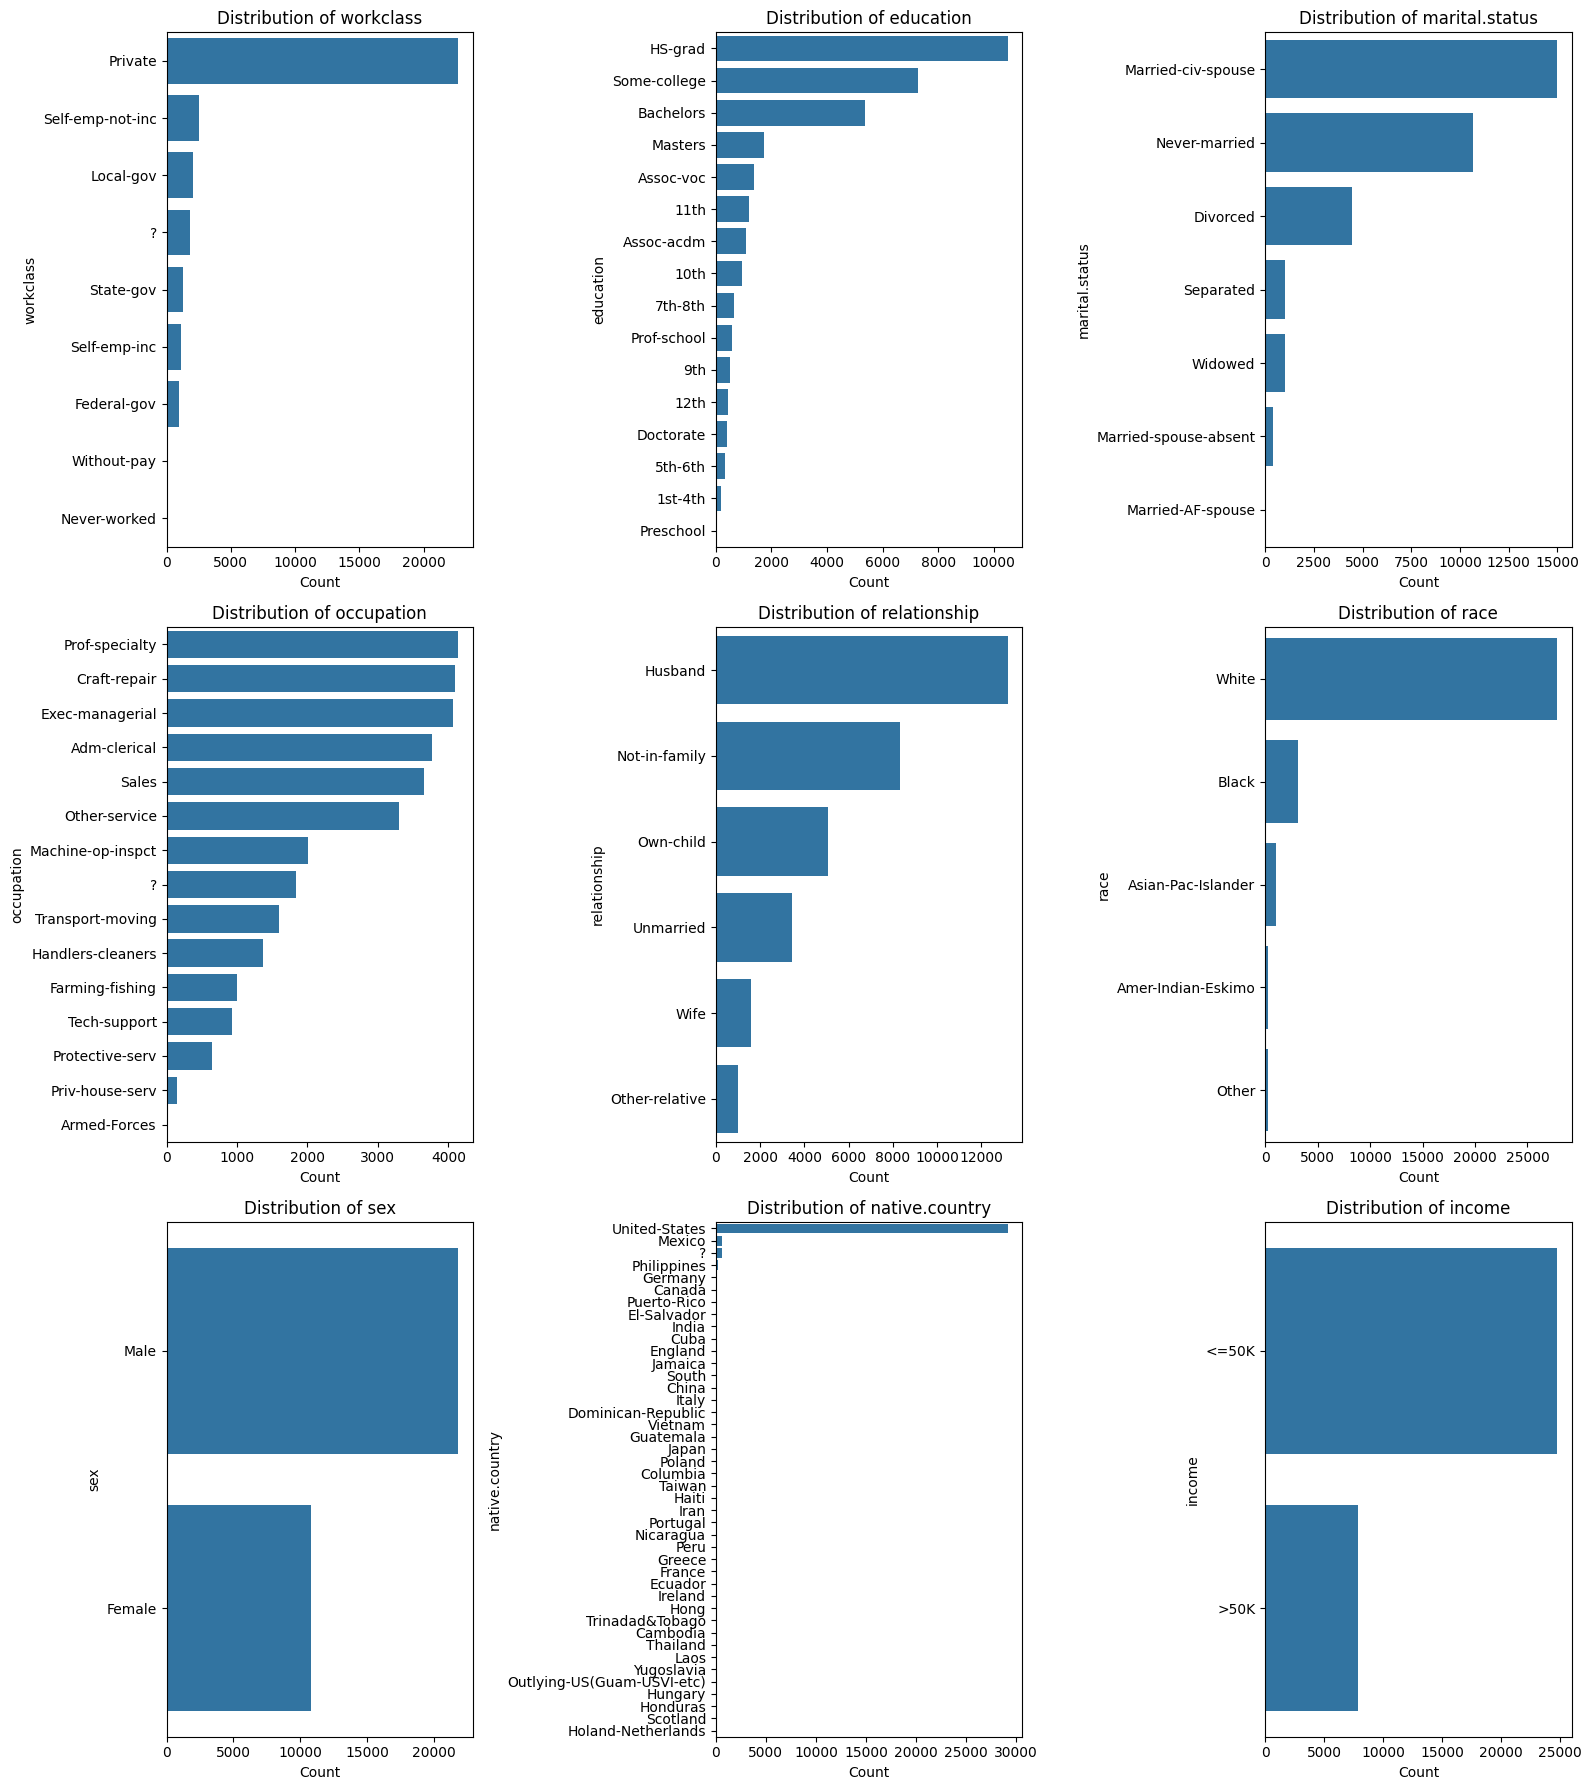

In [ ]:
plt.figure(figsize=(16, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Visualization: Categorical Variables

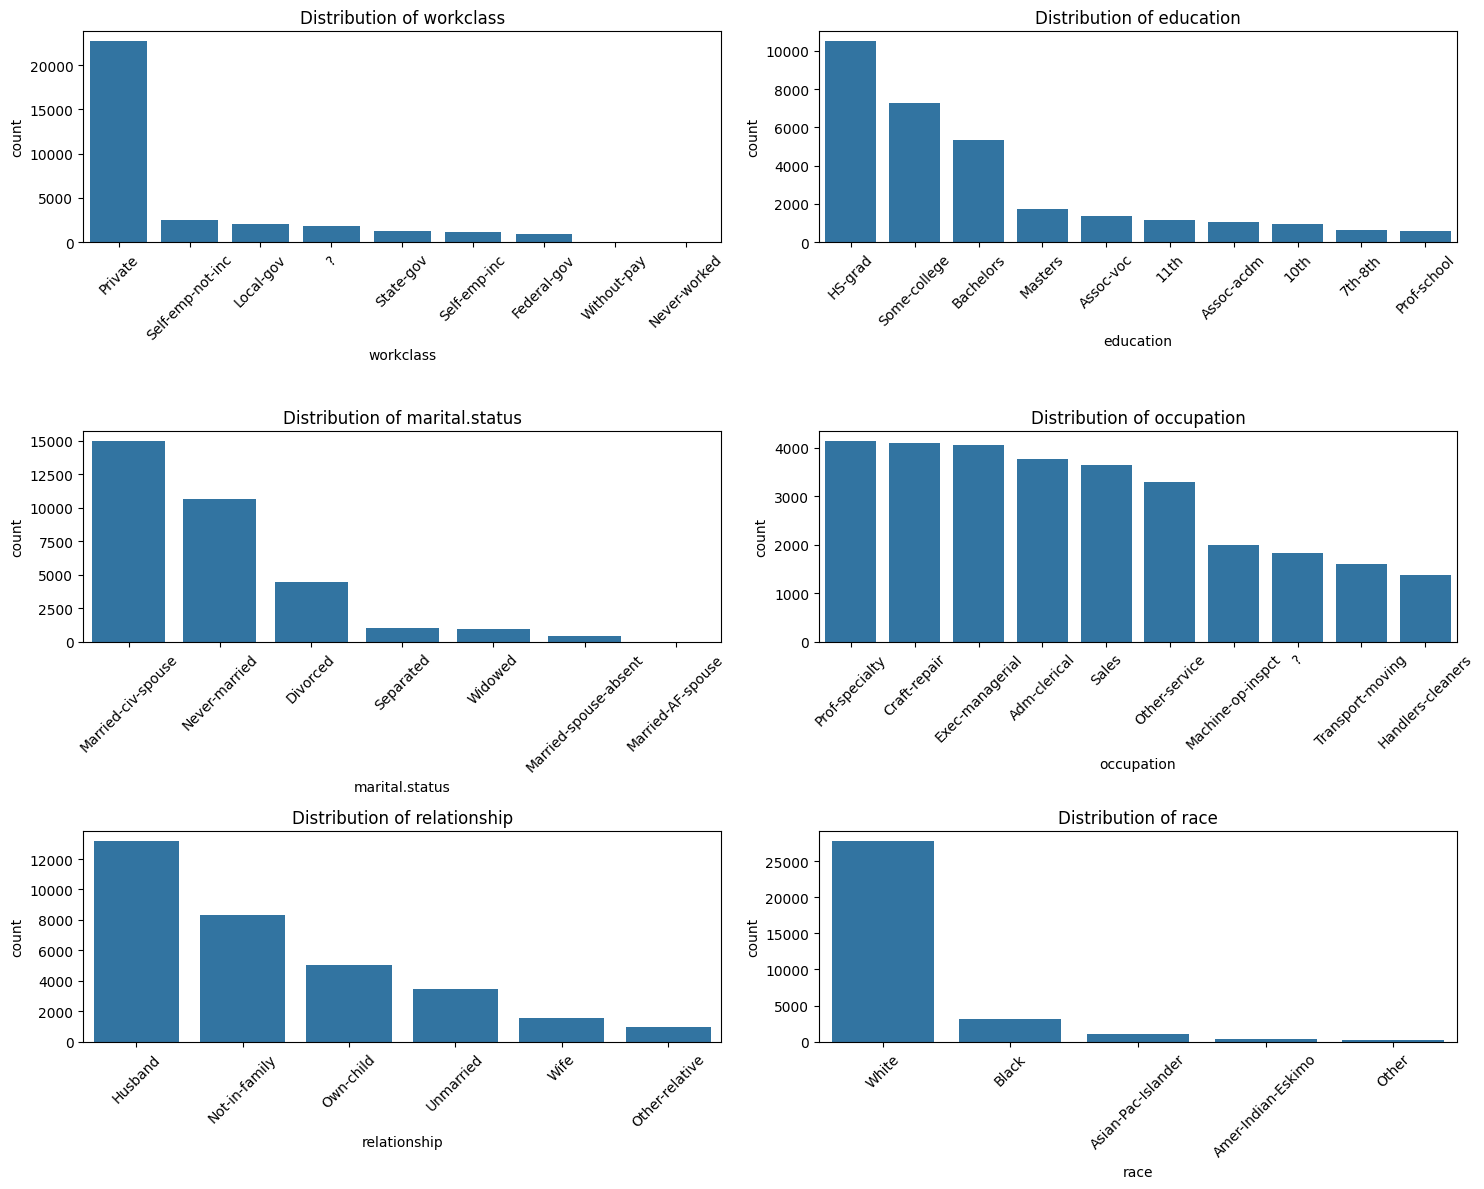

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(15, 12))

# Plot bar charts for the first 6 categorical columns
for i, col in enumerate(categorical_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## Visualization: Numerical Variables

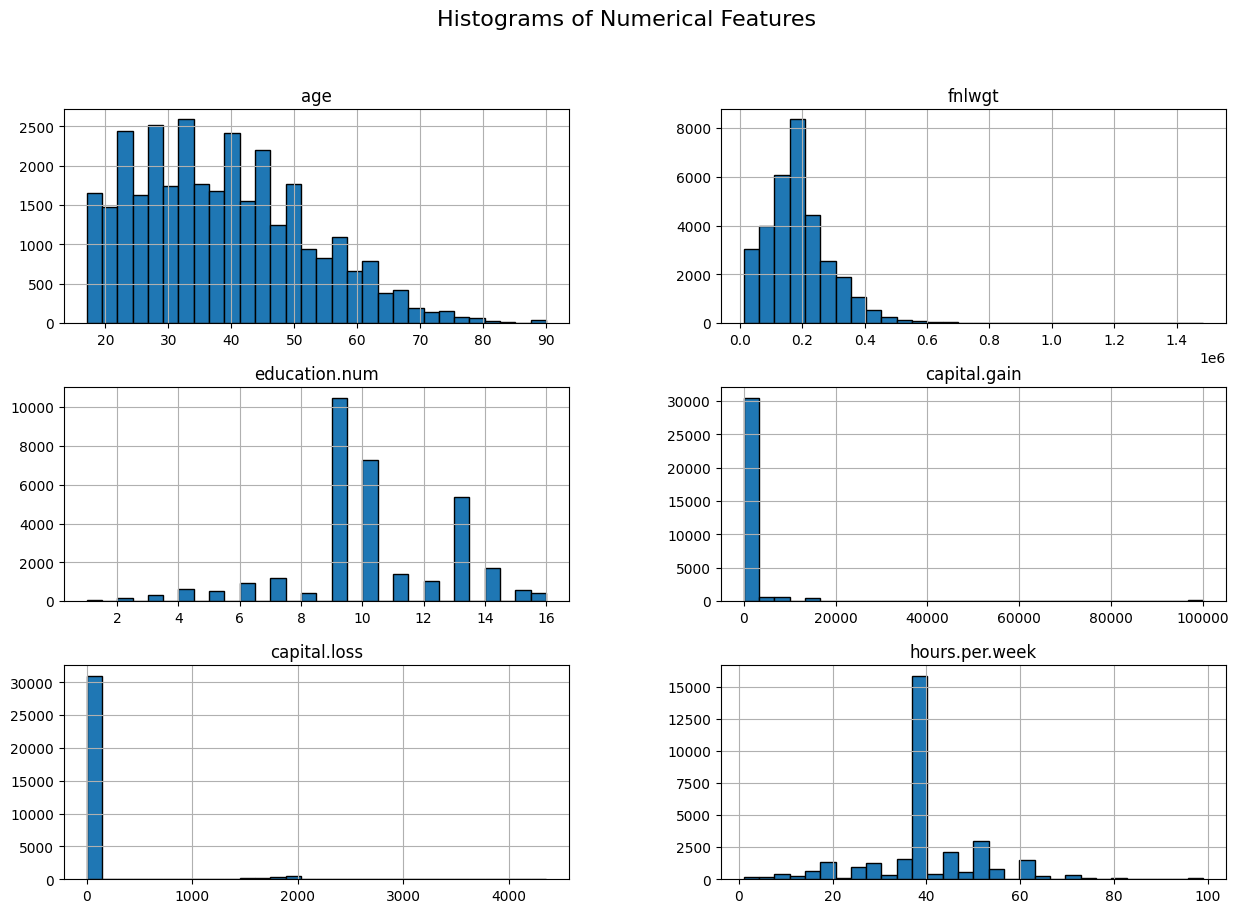

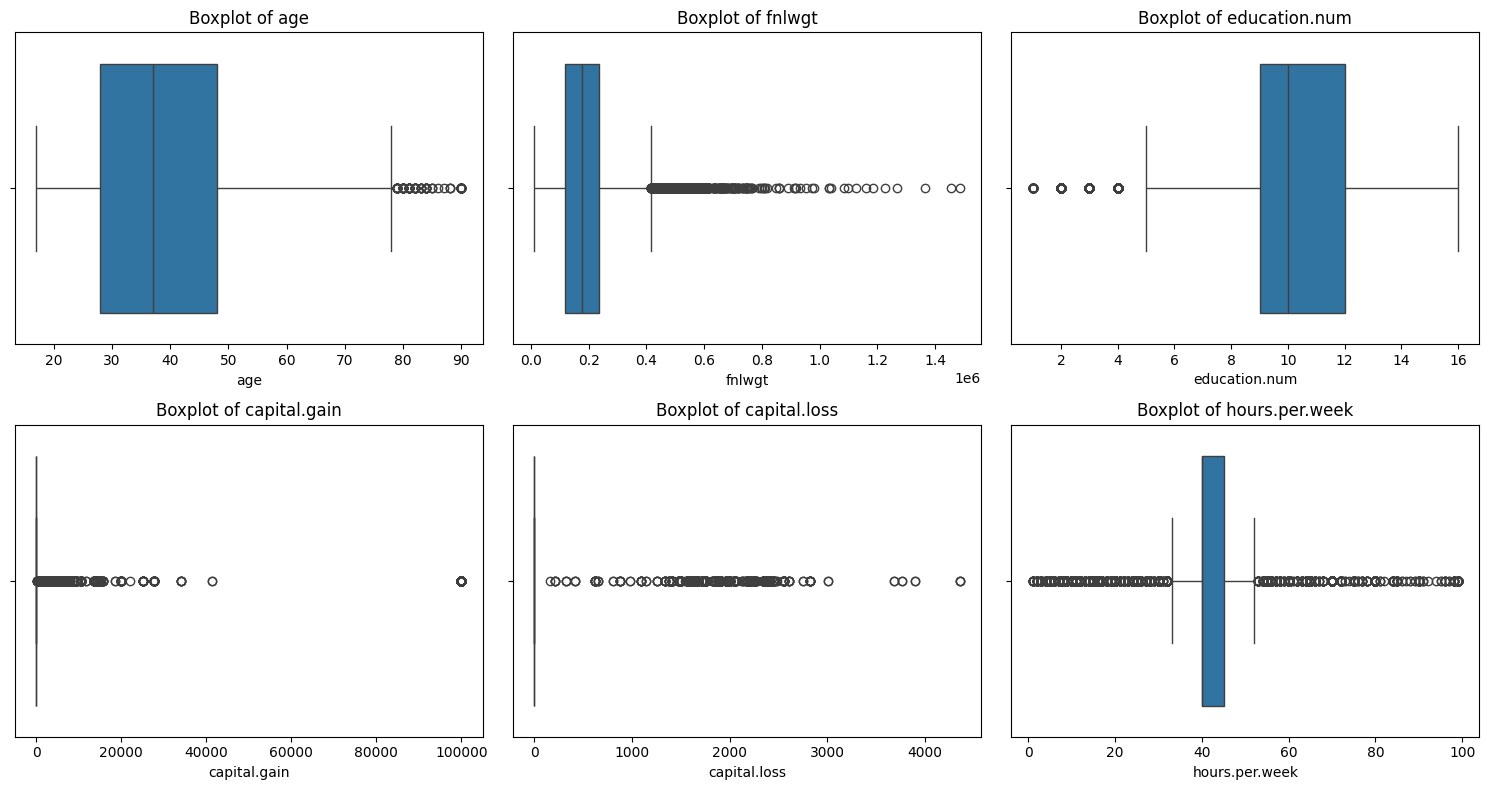

In [ ]:
# Get numerical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Plot histograms for numerical columns
df[numeric_cols].hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## Correlation Heatmap (Numerical Features)

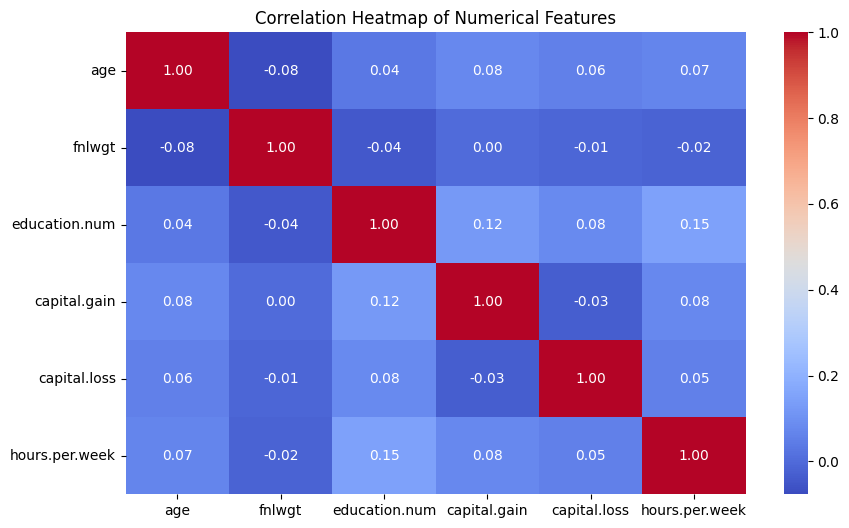

In [ ]:
# Compute correlation matrix for numerical features
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


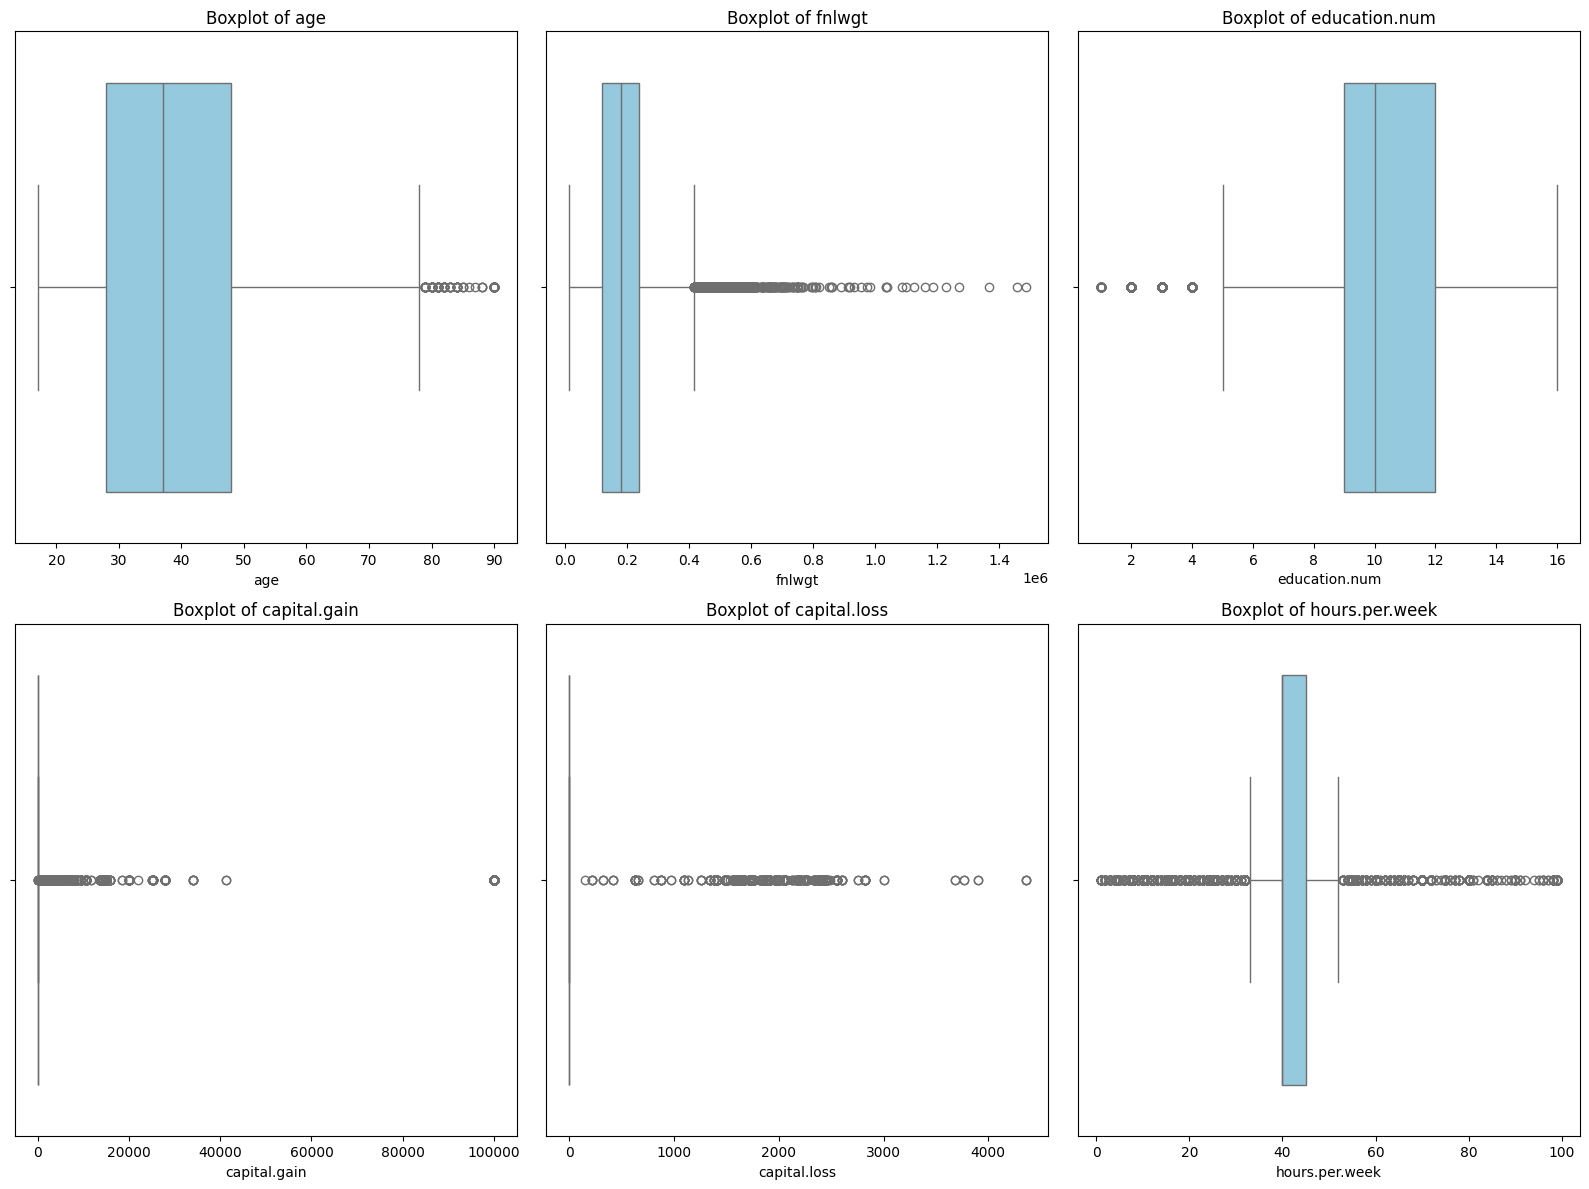

In [ ]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## Target Variable Distribution

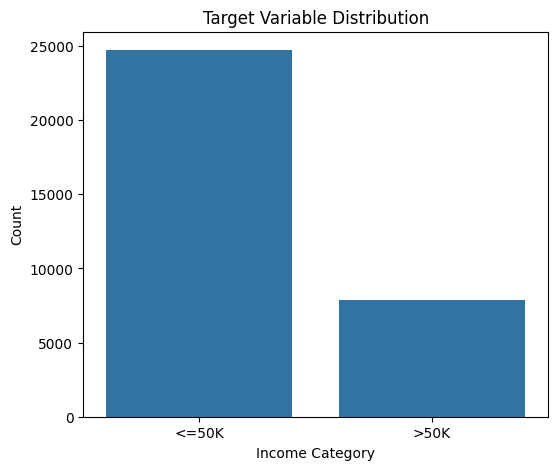


Class distribution:
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [ ]:
# Check target column distribution (income levels)
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="income")
plt.title("Target Variable Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

print("\nClass distribution:")
print(df["income"].value_counts(normalize=True))


## 5. Data Cleaning & Preprocessing

Machine Learning models cannot work directly with raw data.  
We must **clean and preprocess** the dataset so that models can learn patterns effectively.

### Why is this important?
1. **Handling Missing Values:**  
   - Many categorical values in this dataset are recorded as `" ?"` instead of being empty.  
   - If we don’t handle them, the model may treat `" ?"` as a meaningful category, which is incorrect.  

2. **Dropping Irrelevant Columns:**  
   - The dataset contains a column called `fnlwgt` (final weight).  
   - It was used by statisticians to make the dataset representative of the US population, but it does not help in prediction.  
   - Including irrelevant features can confuse the model.  

3. **Encoding Categorical Variables:**  
   - Machine learning models only understand numbers, not text labels like `"Private"`, `"Self-emp"`, etc.  
   - We must convert categorical variables into numeric form.  
   - We will use **One-Hot Encoding** (create binary columns for each category).  

4. **Scaling Numerical Features:**  
   - Some features (like `age`, `hours-per-week`, `capital-gain`) have very different ranges.  
   - Algorithms like **KNN, Logistic Regression, and SVM** are sensitive to feature scale.  
   - We will standardize numerical features using **StandardScaler** so they all have mean = 0 and standard deviation = 1.  
   - Note: Tree-based methods (Decision Trees, Random Forests) are *not sensitive* to scaling, but since we want a fair comparison across models, we will scale anyway.  

5. **Splitting into Training and Test Sets:**  
   - We split the dataset into **training (80%)** and **testing (20%)** subsets.  
   - The model will learn patterns from the training set and then we will evaluate it on the test set.  


## Replacing and removing rows with missing values

In [ ]:
# Replace " ?" with NaN for easier handling
df.replace("?", np.nan, inplace=True)

# Count missing values after replacement
print("Missing values after replacement:")
print(df.isnull().sum())

# Drop rows with missing values (simplest approach for now)
before_rows = df.shape[0]
df.dropna(inplace=True)
after_rows = df.shape[0]

print(f"\nDropped {before_rows - after_rows} rows with missing values.")
print("New dataset shape:", df.shape)


Missing values after replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Dropped 2399 rows with missing values.
New dataset shape: (30162, 15)


## Drop Irrelevant Column (fnlwgt)

In [ ]:
# Drop the 'fnlwgt' column as it does not add predictive power
if "fnlwgt" in df.columns:
    df.drop(columns=["fnlwgt"], inplace=True)

print("Remaining columns after dropping fnlwgt:")
print(df.columns.tolist())


Remaining columns after dropping fnlwgt:
['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


### Separating Features (X) and Target (y)

In supervised Machine Learning, we always need to clearly define:

- **Features (X):**  
  The input variables that we use to make predictions.  
  Example in this dataset: `age`, `education`, `hours-per-week`, `occupation`, etc.  

- **Target (y):**  
  The output variable (label) that we want to predict.  
  Here, the target is the **income level**:  
  - `"<=50K"` → earns less than or equal to $50K  
  - `">50K"` → earns more than $50K  

Why separate them?  
- The ML model needs to **learn patterns in X** in order to predict **y**.  
- Keeping them separate ensures we don’t accidentally “leak” the answer into the training process.  

---


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=["income"])   # All columns except "income"
y = df["income"]                  # Only the "income" column

# Print shapes to confirm
print("Features shape (X):", X.shape)   # rows, columns of inputs
print("Target shape (y):", y.shape)     # only rows, since it's a single column

# Preview first few rows of X and y
print("\nFirst 5 rows of Features (X):")
display(X.head())

print("\nFirst 5 rows of Target (y):")
print(y.head())


Features shape (X): (30162, 14)
Target shape (y): (30162,)

First 5 rows of Features (X):


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States



First 5 rows of Target (y):
1    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
Name: income, dtype: object


### Identifying Numeric vs. Categorical Features

Most real-world datasets contain **two types of data**:

1. **Numeric (Quantitative) Features**  
   - Values are numbers that we can directly compute with.  
   - Examples: `age`, `hours-per-week`, `capital-gain`, `capital-loss`.  
   - We often scale them so all values are on a similar range.

2. **Categorical (Qualitative) Features**  
   - Values represent categories or labels, not numbers.  
   - Examples: `workclass`, `education`, `marital-status`, `occupation`.  
   - Machine Learning algorithms can’t directly handle text → we must convert them into numbers (encoding).

---


In [ ]:
# Identify numeric columns (int or float datatypes)
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Identify categorical columns (object datatype = strings)
categorical_cols = X.select_dtypes(include=["object"]).columns

# Print results
print("Numeric columns (quantitative features):")
print(numeric_cols.tolist())

print("\nCategorical columns (qualitative features):")
print(categorical_cols.tolist())


Numeric columns (quantitative features):
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Categorical columns (qualitative features):
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


📌 Explanation of functions used:

.select_dtypes(include=[...]): Selects columns by data type.

"int64" / "float64" → numeric values.

"object" → text/categorical values.

.columns: Returns the column names.

.tolist(): Converts column names into a Python list for easy reading.

## 6. Preprocessing Pipeline

Now that we know which columns are **numeric** and which are **categorical**,  
we need to transform them so they are ready for machine learning models.

---

### Why do we need preprocessing?
1. **Numeric features** (like `age`, `hours-per-week`):  
   - These can have very different ranges (e.g., age ~ 20–90, hours-per-week ~ 0–100, capital-gain up to thousands).  
   - Some algorithms (like **Logistic Regression, KNN, SVM**) are very sensitive to scale.  
   - Example: If one feature has very large numbers, it will dominate distance calculations in KNN.  
   - Solution → **Standardization**: convert numbers so they have mean = 0 and standard deviation = 1.  

2. **Categorical features** (like `workclass`, `education`, `occupation`):  
   - ML models cannot work with strings directly.  
   - Example: `"Private"` vs `"Self-Employed"` are just text, but models need numeric inputs.  
   - Solution → **One-Hot Encoding**: create binary columns (0/1) for each category.  
     - Example: `"education" = Bachelors` → `education_Bachelors = 1, education_Masters = 0, ...`.  

3. **Why use a Pipeline?**  
   - Instead of manually transforming data step by step, we use a **pipeline**.  
   - A pipeline ensures that:
     - All transformations are applied in the correct order.  
     - The **same transformations** are applied to training and test data.  
     - It’s much easier to combine preprocessing with models.  

---

### Tools from scikit-learn:
- **`StandardScaler`**: scales numeric data to mean = 0, std = 1.  
- **`OneHotEncoder`**: converts categorical text labels into binary dummy variables.  
- **`ColumnTransformer`**: allows us to apply **different transformations to different columns**.  
- **`Pipeline`**: chains preprocessing steps and model training into one workflow.  

---


In [ ]:
# Preprocessing for numeric data: scale features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Define transformers
numeric_transformer = StandardScaler()   # scales numerical features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
# OneHotEncoder creates dummy variables, "ignore" prevents errors if test set has unseen categories

# Step 2: Create a ColumnTransformer
# This tells sklearn:
# - Apply StandardScaler to numeric columns
# - Apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),    # numeric pipeline
        ("cat", categorical_transformer, categorical_cols)  # categorical pipeline
    ]
)

# Check structure
print("✅ Preprocessing pipeline created (scaling + encoding).")
print("Numeric columns will be scaled; categorical columns will be one-hot encoded.")


✅ Preprocessing pipeline created (scaling + encoding).
Numeric columns will be scaled; categorical columns will be one-hot encoded.


In [ ]:
numeric_cols
df ['age']

,age
1,82
3,54
4,41
5,34
6,38
...,...
32556,22
32557,27
32558,40
32559,58


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])

In [ ]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


## 7. Splitting the Data into Training and Testing Sets

Now that our preprocessing pipeline is ready, we need to **divide the dataset** into two parts:

1. **Training Set (usually 70–80% of the data)**  
   - This is the data the model will **learn from**.  
   - The model will look for patterns in the training set.  

2. **Testing Set (usually 20–30% of the data)**  
   - This is the data the model has **never seen before**.  
   - After training, we use this set to check how well the model performs on **new, unseen data**.  
   - This helps us estimate **real-world performance**.  

---

### Why not train and test on the same data?
- If we evaluate the model on the same data it was trained on, the model might just “memorize” the answers.  
- This is called **overfitting** → the model performs well on training data but fails on new data.  
- That’s why we split: to test the model’s ability to **generalize**.  

---

### Important Parameters in `train_test_split`:
- **`test_size`**: Proportion of the dataset used for testing. (Here: 0.2 = 20%).  
- **`random_state`**: A seed value to make sure results are reproducible. If you run the code again, the split will be the same.  
- **`stratify=y`**: Ensures the train/test sets have the **same proportion of income classes** as the original dataset.  
  - Example: If 75% of people earn `<=50K` in the dataset, both train and test sets will keep this ratio.  
  - This prevents imbalance problems in classification.  


  When we split the dataset, we create **four subsets**:

1. **`X_train`** → Features (input variables) for training  
   - These are the rows and columns the model will learn patterns from.  
   - Example: age, occupation, hours-per-week, etc. (but only for the training group of people).  

2. **`y_train`** → Target values (labels) for training  
   - These are the correct answers (income levels) for the training set.  
   - The model uses them to adjust its parameters during learning.  

3. **`X_test`** → Features (input variables) for testing  
   - Same type of data as `X_train`, but kept aside.  
   - The model **never sees this during training**.  

4. **`y_test`** → Target values (labels) for testing  
   - The true income levels for the test set.  
   - After training, we compare the model’s predictions with these real answers to measure performance.  

---

### Workflow Summary:
- The model is **trained on (X_train, y_train)**.  
- The model is **evaluated on (X_test, y_test)**.  
- If the model performs well on both, it means it has **generalized** and is not just memorizing.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Arguments:
# - X : features (input variables)
# - y : target (output variable, income)
# - test_size=0.2 : 20% of the data will be used as the test set
# - random_state=42 : random seed for reproducibility (ensures same split every time)
# - stratify=y : keeps the ratio of classes (<=50K and >50K) consistent in both train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Let's inspect the shapes
print("Feature matrix for TRAINING (X_train):", X_train.shape)
print("Target vector for TRAINING (y_train):", y_train.shape)
print("Feature matrix for TESTING (X_test):", X_test.shape)
print("Target vector for TESTING (y_test):", y_test.shape)

# Explanation:
# - X_train: rows of features used to TRAIN the model
# - y_train: correct income labels for those rows
# - X_test: rows of features used to TEST the model
# - y_test: correct income labels for those rows

# Double-check the distribution of target classes
print("\nClass distribution in TRAINING set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in TESTING set:")
print(y_test.value_counts(normalize=True) * 100)


Feature matrix for TRAINING (X_train): (24129, 14)
Target vector for TRAINING (y_train): (24129,)
Feature matrix for TESTING (X_test): (6033, 14)
Target vector for TESTING (y_test): (6033,)

Class distribution in TRAINING set:
income
<=50K    75.10879
>50K     24.89121
Name: proportion, dtype: float64

Class distribution in TESTING set:
income
<=50K    75.103597
>50K     24.896403
Name: proportion, dtype: float64


In [ ]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
13322,22,Self-emp-inc,150683,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,24,United-States
28882,25,State-gov,262664,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
22,61,Private,29059,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,2754,25,United-States
8588,44,Federal-gov,44822,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
26747,50,Self-emp-inc,140516,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23895,47,Private,341471,HS-grad,9,Divorced,Priv-house-serv,Not-in-family,White,Female,0,0,4,United-States
24093,19,Private,93518,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
11386,35,Self-emp-inc,196373,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
18187,22,Private,173736,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States


## 8. Model 1 – Logistic Regression

We will now implement **Logistic Regression** as our first classification model.  

Key points to remember:
- It outputs probabilities between 0 and 1 using the **sigmoid function**.  
- A threshold (default = 0.5) is used to assign the class (`<=50K` or `>50K`).  
- This will serve as our **baseline model** to compare with more advanced classifiers.  

Steps:
1. Build a pipeline that includes preprocessing + Logistic Regression.  
2. Train the model on the training set.  
3. Evaluate it on the test set using accuracy, confusion matrix, and classification report.


✅ Logistic Regression Evaluation Metrics:
Accuracy : 0.8536
Precision: 0.8479
Recall   : 0.8536
F1 Score : 0.8487


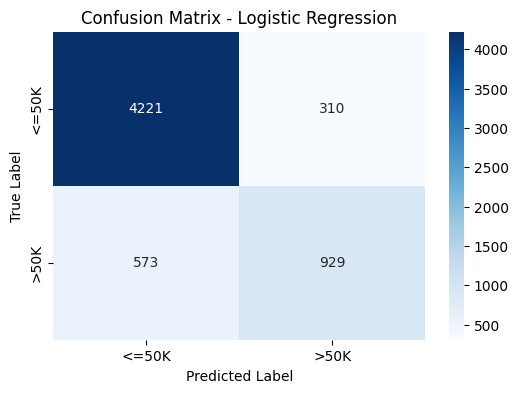

In [ ]:
# Step 1: Import necessary modules
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Build a pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Step 3: Train the model
log_reg_pipeline.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg_pipeline.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("✅ Logistic Regression Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=50K", ">50K"],   # predicted labels
            yticklabels=["<=50K", ">50K"])   # actual labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## 9. Model 2 – K-Nearest Neighbors (KNN)

### Key idea:
- KNN is a **distance-based algorithm**.  
- To classify a new data point, it looks at the **k nearest neighbors** in the training set.  
- The majority class among those neighbors is assigned as the prediction.  

### Important points:
- **Distance metrics:**  
  - Euclidean distance (straight-line distance).  
  - Manhattan distance (grid-like distance).  
- **Choice of k:**  
  - Small k → model is sensitive to noise (low bias, high variance).  
  - Large k → model is smoother but may miss local patterns (high bias, low variance).  



✅ KNN Evaluation Metrics (k=5):
Accuracy : 0.8359
Precision: 0.8320
Recall   : 0.8359
F1 Score : 0.8335


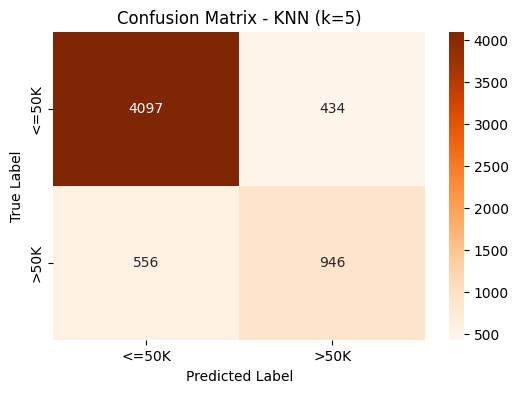

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Build pipeline
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2))
    # p=2 → Euclidean distance, p=1 → Manhattan distance
])

# Step 2: Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_knn = knn_pipeline.predict(X_test)

# Step 4: Evaluate the model (overall metrics)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average="weighted")
recall_knn = recall_score(y_test, y_pred_knn, average="weighted")
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

print("✅ KNN Evaluation Metrics (k=5):")
print(f"Accuracy : {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall   : {recall_knn:.4f}")
print(f"F1 Score : {f1_knn:.4f}")

# Step 5: Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()


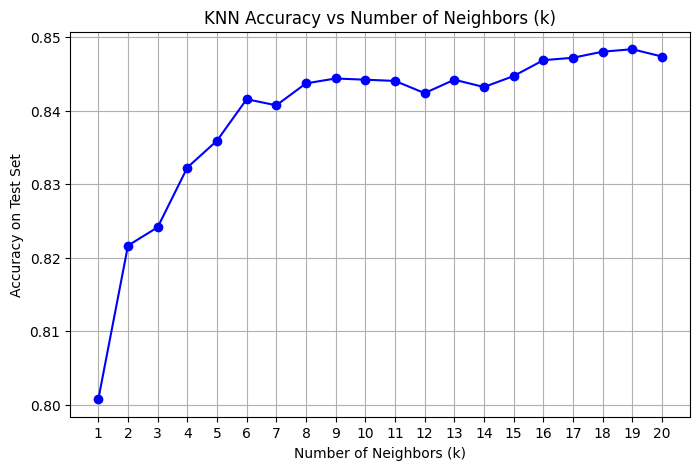

✅ Best k value: 19 with Accuracy = 84.83%


In [ ]:


# Try different values of k (number of neighbors)
k_values = range(1, 21)   # test k=1 to 20
accuracies = []

for k in k_values:
    knn_model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=k))
    ])
    knn_model.fit(X_train, y_train)
    y_pred_temp = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="blue")
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"✅ Best k value: {best_k} with Accuracy = {max(accuracies)*100:.2f}%")


## 10. Model 3 - Support Vector Machine (SVM)

### Key idea:
- SVM is a **large margin classifier**.  
- It finds the decision boundary (hyperplane) that **maximizes the margin** between two classes.  
- Only the "support vectors" (points closest to the boundary) matter in determining the hyperplane.  

### Kernels:
- **Linear SVM**: works well when classes can be separated with a straight line (or hyperplane).  
- **Nonlinear SVM**: when classes are not linearly separable, we use the **kernel trick**.  
  - The **RBF (Radial Basis Function)** kernel is commonly used to create flexible, curved boundaries.  


✅ Linear SVM Evaluation Metrics:
Accuracy : 0.8520
Precision: 0.8457
Recall   : 0.8520
F1 Score : 0.8453


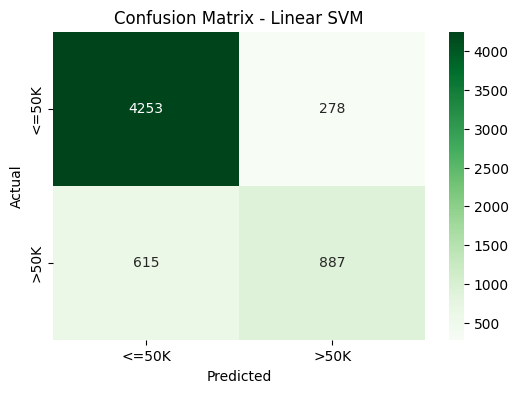

In [ ]:
# ---------------------------------------------------
# SVM with Linear Kernel
# ---------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Build pipeline with preprocessing + SVM (linear kernel)
svm_linear_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="linear"))   # Linear kernel SVM
])

# Step 2: Train the model
svm_linear_pipeline.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_svm_linear = svm_linear_pipeline.predict(X_test)

# Step 4: Evaluate model (overall metrics)
acc_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
precision_svm_linear = precision_score(y_test, y_pred_svm_linear, average="weighted")
recall_svm_linear = recall_score(y_test, y_pred_svm_linear, average="weighted")
f1_svm_linear = f1_score(y_test, y_pred_svm_linear, average="weighted")

print("✅ Linear SVM Evaluation Metrics:")
print(f"Accuracy : {acc_svm_linear:.4f}")
print(f"Precision: {precision_svm_linear:.4f}")
print(f"Recall   : {recall_svm_linear:.4f}")
print(f"F1 Score : {f1_svm_linear:.4f}")

# Step 5: Confusion Matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_linear, annot=True, fmt="d", cmap="Greens",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()


✅ RBF SVM Evaluation Metrics:
Accuracy : 0.8596
Precision: 0.8542
Recall   : 0.8596
F1 Score : 0.8539


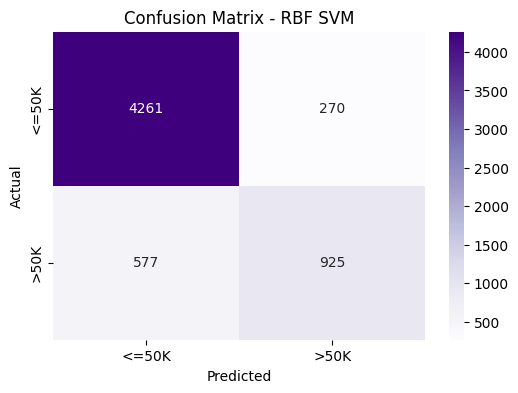

In [ ]:
# ---------------------------------------------------
# SVM with RBF Kernel
# ---------------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Build pipeline with preprocessing + SVM (RBF kernel)
svm_rbf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", gamma="scale"))  # RBF kernel with default gamma
])

# Step 2: Train the model
svm_rbf_pipeline.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_svm_rbf = svm_rbf_pipeline.predict(X_test)

# Step 4: Evaluate model (overall metrics)
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf, average="weighted")
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf, average="weighted")
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average="weighted")

print("✅ RBF SVM Evaluation Metrics:")
print(f"Accuracy : {acc_svm_rbf:.4f}")
print(f"Precision: {precision_svm_rbf:.4f}")
print(f"Recall   : {recall_svm_rbf:.4f}")
print(f"F1 Score : {f1_svm_rbf:.4f}")

# Step 5: Confusion Matrix
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm_rbf, annot=True, fmt="d", cmap="Purples",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RBF SVM")
plt.show()


## 11. Model 4 – Decision Tree Classifier

### Key idea:
- A Decision Tree splits the data into smaller groups based on feature values.  
- It asks a sequence of **yes/no questions** (e.g., "Is age > 40?") until it classifies a sample.  
- Easy to understand and visualize.  

### Pros:
- Very interpretable.  
- Handles both numerical and categorical data.  

### Cons:
- Can easily **overfit** if not restricted (tree depth can grow too large).  



✅ Decision Tree Evaluation Metrics:
Accuracy : 0.8521
Precision: 0.8464
Recall   : 0.8521
F1 Score : 0.8428


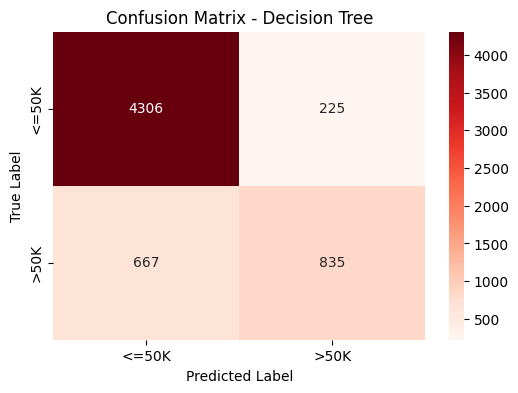

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 1: Build a pipeline
# - Preprocessor: scales numeric features + one-hot encodes categorical features
# - Classifier: Decision Tree
#   - max_depth=5: limits the depth of the tree (to prevent overfitting)
#   - random_state=42: ensures reproducibility
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Step 2: Train the model on the training set
# - X_train goes through preprocessing first
# - Then the Decision Tree learns patterns between features and target
tree_pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the test set
# - X_test is preprocessed (same transformations as training data)
# - The trained tree makes predictions for each row
y_pred_tree = tree_pipeline.predict(X_test)

# Step 4: Evaluate the model
# Accuracy: percentage of correctly classified samples
acc_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree, average="weighted")
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

print("✅ Decision Tree Evaluation Metrics:")
print(f"Accuracy : {acc_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall   : {recall_tree:.4f}")
print(f"F1 Score : {f1_tree:.4f}")

# Step 5: Confusion Matrix
# Rows = Actual labels, Columns = Predicted labels
# Helps us see where the model is getting confused
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Reds",
            xticklabels=["<=50K", ">50K"],   # Predicted categories
            yticklabels=["<=50K", ">50K"])   # Actual categories
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


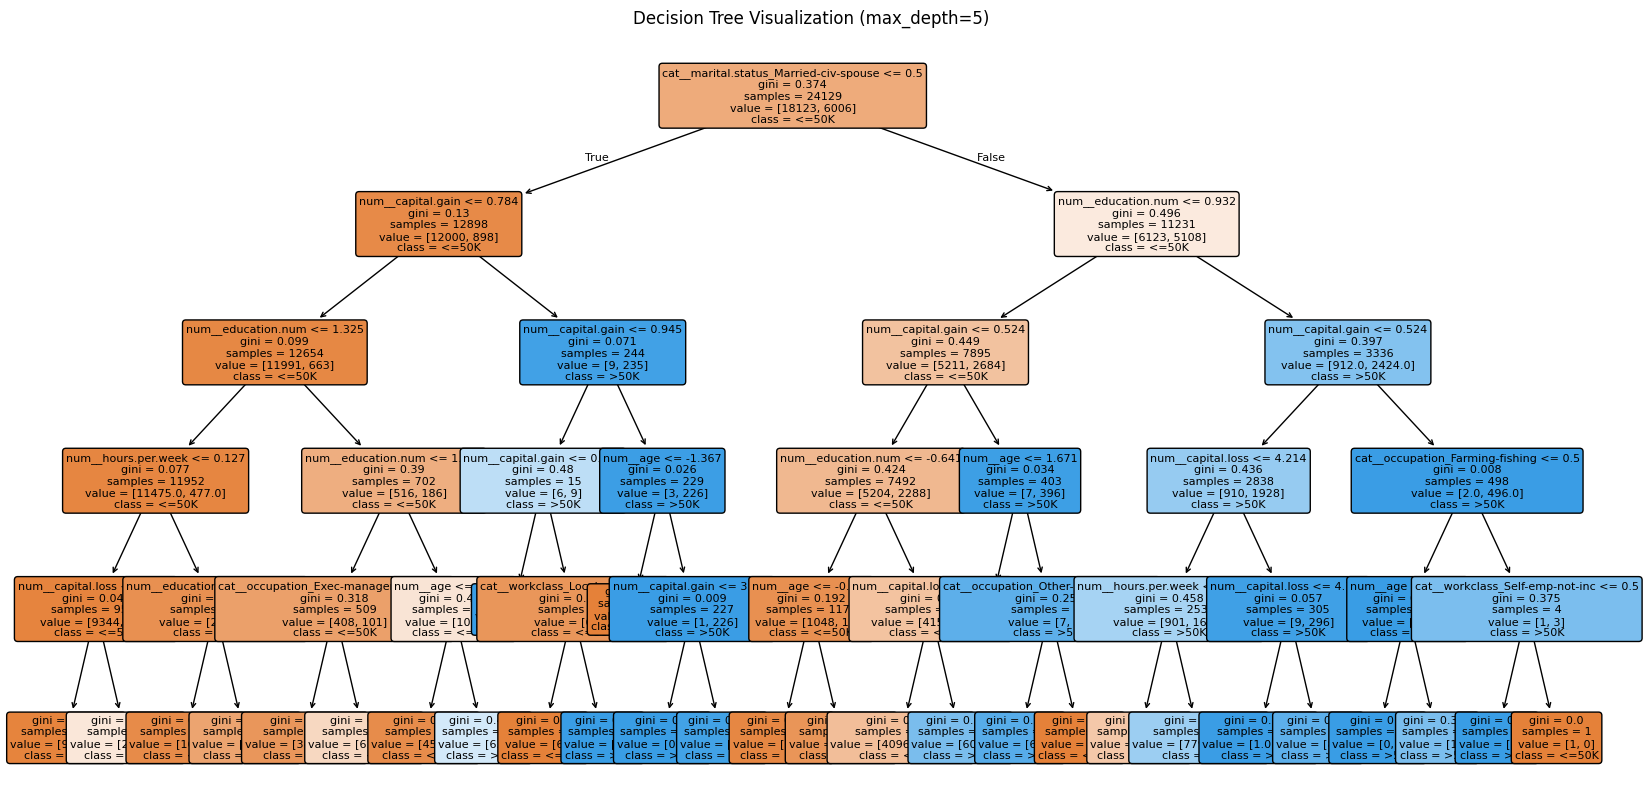

In [ ]:

# Extract the trained Decision Tree model from the pipeline
tree_clf = tree_pipeline.named_steps["classifier"]

# Visualize the structure of the tree
# - Each node shows: splitting condition, gini score, number of samples, class distribution
# - 'gini' is the measure of impurity (lower is better)
# - Leaves are the final decision outputs
plt.figure(figsize=(20, 10))
plot_tree(tree_clf,
          filled=True,                       # fill colors for classes
          feature_names=list(preprocessor.get_feature_names_out()),  # transformed feature names
          class_names=["<=50K", ">50K"],     # target classes
          rounded=True,                      # rounded node boxes
          fontsize=8)                        # smaller font to fit more detail
plt.title("Decision Tree Visualization (max_depth=5)")
plt.show()

/tmp/ipython-input-1640848437.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices],


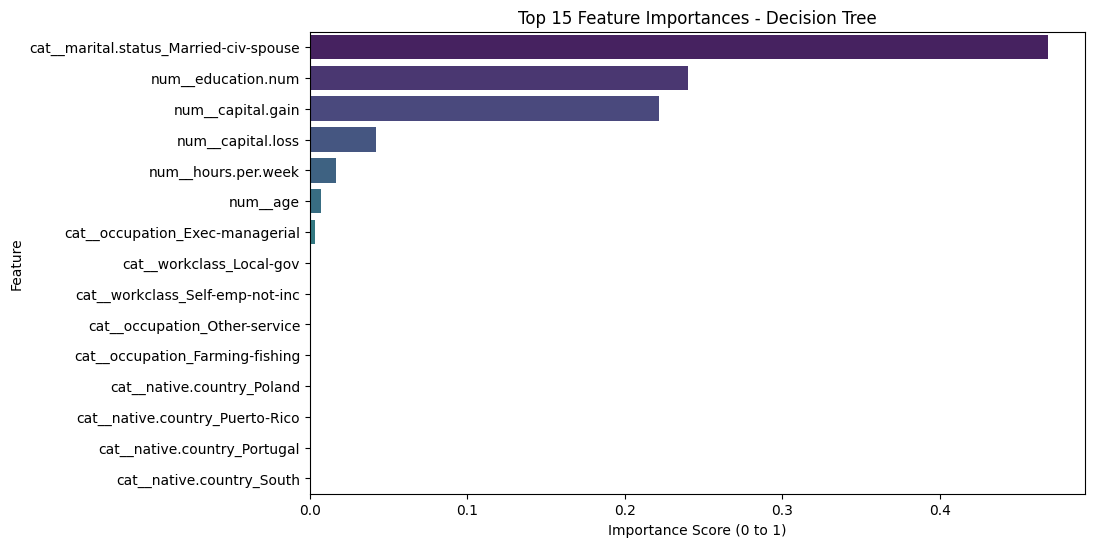

In [ ]:

# Step 1: Get feature importance scores from the trained Decision Tree
importances = tree_clf.feature_importances_

# Step 2: Get the names of features after preprocessing (scaled + encoded features)
feature_names = preprocessor.get_feature_names_out()

# Step 3: Sort features by importance (descending order)
indices = np.argsort(importances)[::-1][:15]  # top 15 features

# Step 4: Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices],
            y=np.array(feature_names)[indices],
            palette="viridis")
plt.title("Top 15 Feature Importances - Decision Tree")
plt.xlabel("Importance Score (0 to 1)")
plt.ylabel("Feature")
plt.show()


### Effect of Tree Depth on Decision Trees

Decision Trees can **grow until every sample is perfectly classified**.  
- A **deep tree** (no max_depth limit) can memorize the training data → very high training accuracy but poor generalization (overfitting).  
- A **shallow tree** (small max_depth) may underfit → it doesn’t capture enough patterns.  

We will compare:
1. **Unlimited depth** (overfitting risk).  
2. **Limited depth = 5** (controlled complexity).  

We’ll look at accuracy, confusion matrices, and feature importances.


✅ Decision Tree (Unlimited Depth) Evaluation Metrics:
Accuracy : 0.8167
Precision: 0.8150
Recall   : 0.8167
F1 Score : 0.8158


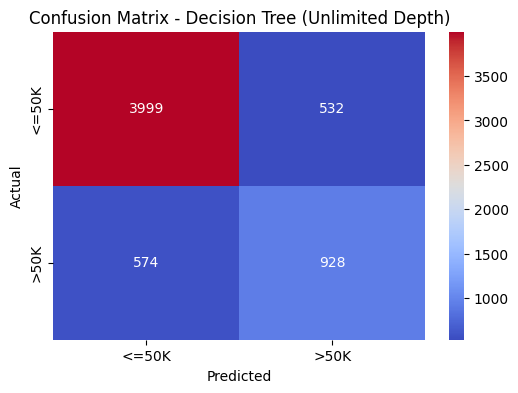

In [ ]:
tree_unlimited_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))  # no max_depth set
])

tree_unlimited_pipeline.fit(X_train, y_train)
y_pred_tree_unlimited = tree_unlimited_pipeline.predict(X_test)

# Overall evaluation metrics
acc_tree_unlimited = accuracy_score(y_test, y_pred_tree_unlimited)
precision_tree_unlimited = precision_score(y_test, y_pred_tree_unlimited, average="weighted")
recall_tree_unlimited = recall_score(y_test, y_pred_tree_unlimited, average="weighted")
f1_tree_unlimited = f1_score(y_test, y_pred_tree_unlimited, average="weighted")

print("✅ Decision Tree (Unlimited Depth) Evaluation Metrics:")
print(f"Accuracy : {acc_tree_unlimited:.4f}")
print(f"Precision: {precision_tree_unlimited:.4f}")
print(f"Recall   : {recall_tree_unlimited:.4f}")
print(f"F1 Score : {f1_tree_unlimited:.4f}")

# Confusion Matrix
cm_tree_unlimited = confusion_matrix(y_test, y_pred_tree_unlimited)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_unlimited, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Unlimited Depth)")
plt.show()


✅ Decision Tree (Depth=5) Evaluation Metrics:
Accuracy : 0.8521
Precision: 0.8464
Recall   : 0.8521
F1 Score : 0.8428


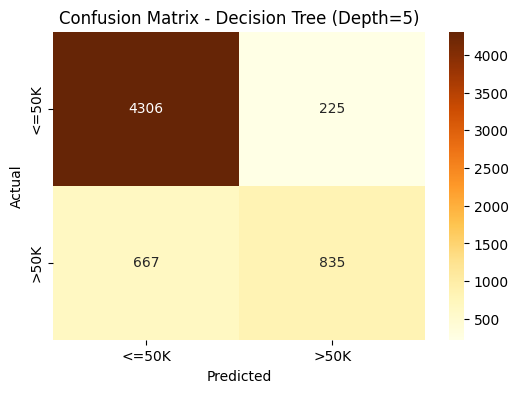

In [ ]:
# Decision Tree with Depth=5 (Controlled)

tree_depth5_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

tree_depth5_pipeline.fit(X_train, y_train)
y_pred_tree_depth5 = tree_depth5_pipeline.predict(X_test)

# Overall evaluation metrics
acc_tree_depth5 = accuracy_score(y_test, y_pred_tree_depth5)
precision_tree_depth5 = precision_score(y_test, y_pred_tree_depth5, average="weighted")
recall_tree_depth5 = recall_score(y_test, y_pred_tree_depth5, average="weighted")
f1_tree_depth5 = f1_score(y_test, y_pred_tree_depth5, average="weighted")

print("✅ Decision Tree (Depth=5) Evaluation Metrics:")
print(f"Accuracy : {acc_tree_depth5:.4f}")
print(f"Precision: {precision_tree_depth5:.4f}")
print(f"Recall   : {recall_tree_depth5:.4f}")
print(f"F1 Score : {f1_tree_depth5:.4f}")

# Confusion Matrix
cm_tree_depth5 = confusion_matrix(y_test, y_pred_tree_depth5)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_depth5, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Depth=5)")
plt.show()


### Observations:
- **Unlimited Depth Tree**:
  - Likely has higher accuracy on training data but may overfit.
  - The tree can become extremely complex (hard to interpret).
  - May not generalize well on unseen test data.

- **Depth=5 Tree**:
  - Simpler, more interpretable.
  - Lower training accuracy but better generalization.
  - Strikes a balance between bias and variance.

➡️ This illustrates the **bias–variance tradeoff**:  
- Deep models = low bias, high variance.  
- Shallow models = high bias, low variance.


## 12. Model 5 – Random Forest Classifier

### Key idea:
- A **Random Forest** is an **ensemble** of Decision Trees.  
- Each tree is trained on a **random subset of the data (bagging)** and a **random subset of features**.  
- The final prediction is made by **majority voting** (classification).  

### Why Random Forests work well:
- A single Decision Tree can overfit, but combining many trees reduces variance.  
- Bagging ensures trees are diverse → improves generalization.  
- Random Forests also provide **feature importance scores**, showing which variables are most useful.  


✅ Random Forest Evaluation Metrics:
Accuracy : 0.8538
Precision: 0.8488
Recall   : 0.8538
F1 Score : 0.8500


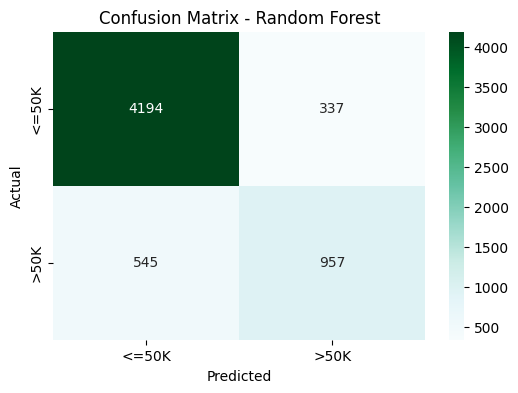

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Build pipeline with preprocessing + Random Forest
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,        # number of trees in the forest
        random_state=42,
        n_jobs=-1                # use all CPU cores for speed
    ))
])

# Step 2: Train the Random Forest
rf_pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Step 4: Evaluate performance (overall metrics)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print("✅ Random Forest Evaluation Metrics:")
print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1 Score : {f1_rf:.4f}")

# Step 5: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="BuGn",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


/tmp/ipython-input-275625221.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances[indices],


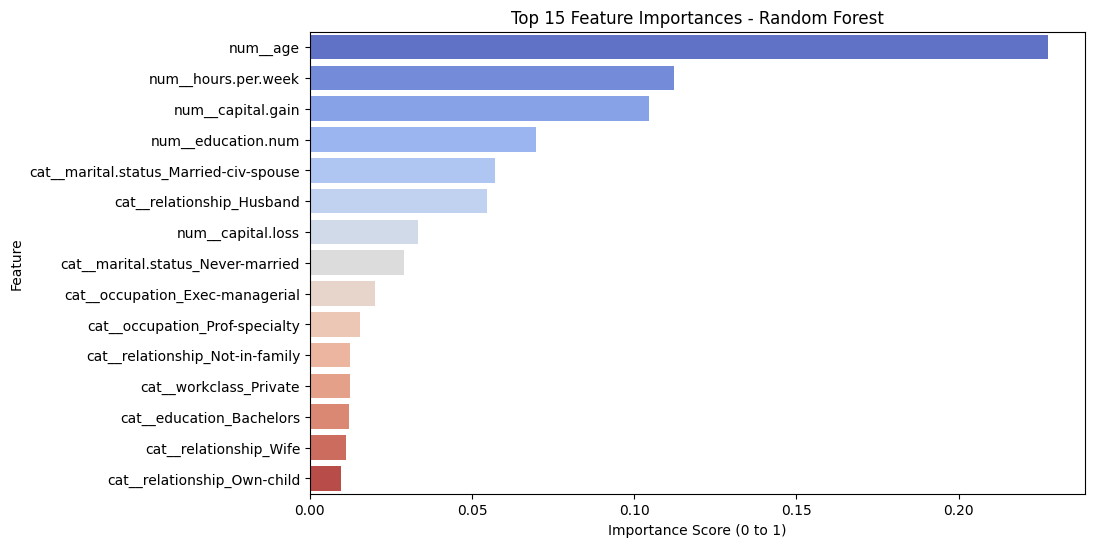

In [ ]:

# Feature Importance - Random Forest

# Extract trained classifier (actual forest) from pipeline
rf_clf = rf_pipeline.named_steps["classifier"]

# Get feature importances
rf_importances = rf_clf.feature_importances_
rf_feature_names = preprocessor.get_feature_names_out()

# Sort features by importance (descending)
indices = np.argsort(rf_importances)[::-1][:15]  # top 15 features

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[indices],
            y=np.array(rf_feature_names)[indices],
            palette="coolwarm")
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score (0 to 1)")
plt.ylabel("Feature")
plt.show()


## 13. Model Comparison

We have now trained and evaluated five different classification algorithms:
1. Logistic Regression  
2. K-Nearest Neighbors (KNN)  
3. Support Vector Machine (SVM – Linear & RBF)  
4. Decision Tree  
5. Random Forest  

To make it easier to compare them, we will:
- Collect their **Accuracy, Precision, Recall, and F1-score**.  
- Display the results in a table.  
- Plot a bar chart for visual comparison.  

This will help us understand:
- Which models perform best on this dataset.  
- The trade-offs between simplicity (Logistic Regression, Decision Tree) vs. power (Random Forest, SVM).  


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Collect performance metrics for all models

# Helper function to calculate metrics
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label=">50K"),
        "Recall": recall_score(y_true, y_pred, pos_label=">50K"),
        "F1-Score": f1_score(y_true, y_pred, pos_label=">50K")
    }

# Gather results
results = []

# Logistic Regression
results.append(get_metrics(y_test, y_pred, "Logistic Regression"))

# KNN
results.append(get_metrics(y_test, y_pred_knn, "KNN (k=5)"))

# SVM - Linear
results.append(get_metrics(y_test, y_pred_svm_linear, "SVM (Linear)"))

# SVM - RBF
results.append(get_metrics(y_test, y_pred_svm_rbf, "SVM (RBF)"))

# Decision Tree (Depth=5)
results.append(get_metrics(y_test, y_pred_tree, "Decision Tree (Depth=5)"))

# Random Forest
results.append(get_metrics(y_test, y_pred_rf, "Random Forest"))

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Display comparison table
print("✅ Model Performance Comparison")
display(results_df)


✅ Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.853638,0.749798,0.618509,0.677855
1,KNN (k=5),0.835903,0.685507,0.629827,0.656489
2,SVM (Linear),0.851981,0.761373,0.590546,0.665167
3,SVM (RBF),0.859606,0.774059,0.615846,0.685947
4,Decision Tree (Depth=5),0.852147,0.787736,0.555925,0.651835
5,Random Forest,0.853804,0.739567,0.637150,0.684549


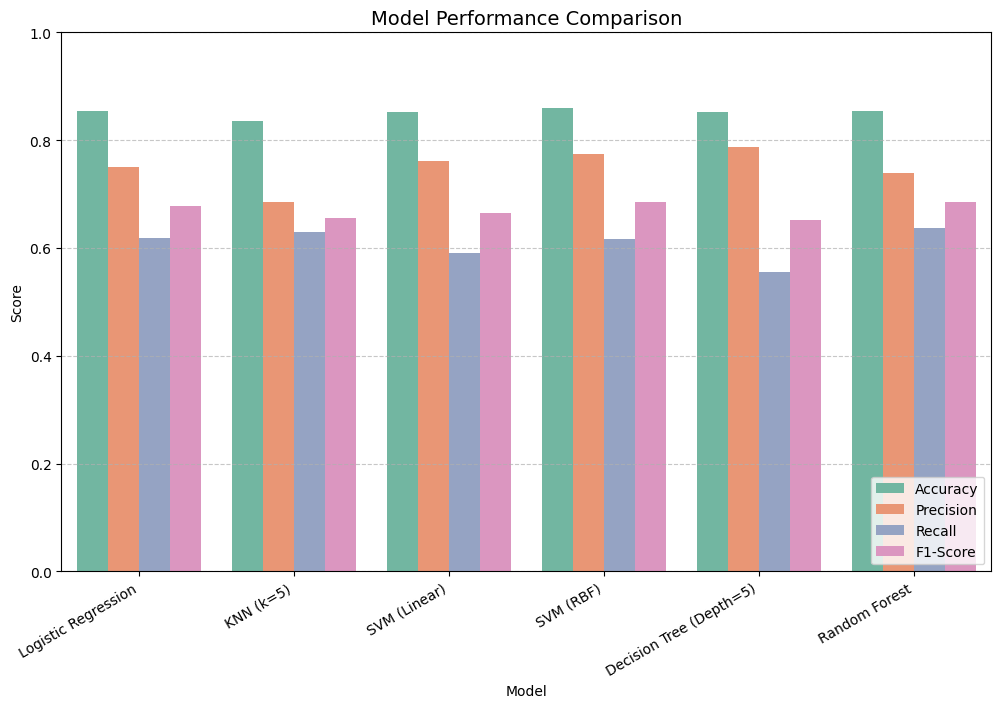

In [ ]:
# ---------------------------------------------------
# Visualization: Accuracy, Precision, Recall, F1-Score
# ---------------------------------------------------

# Set figure size
plt.figure(figsize=(12, 7))

# Melt DataFrame for easier plotting (long format)
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create barplot
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="Set2")

plt.title("Model Performance Comparison", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



### Key Observations:
- **Logistic Regression**  
  - Simple and fast baseline model.  
  - Works surprisingly well, but may not capture complex patterns.  

- **K-Nearest Neighbors (KNN)**  
  - Intuitive, based on distance.  
  - Performance depends heavily on choice of `k` and scaling of features.  
  - Can be slow on large datasets since it stores all training data.  

- **Support Vector Machines (SVM)**  
  - Linear SVM works well when data is linearly separable.  
  - RBF kernel allows modeling nonlinear boundaries.  
  - Can be computationally expensive on big datasets.  

- **Decision Tree**  
  - Easy to interpret (rules, visualization).  
  - Prone to overfitting if not controlled (depth, pruning).  
  - Useful for feature importance insights.  

- **Random Forest**  
  - Ensemble of many decision trees → more stable and accurate.  
  - Reduces overfitting compared to a single tree.  
  - Provides reliable feature importance rankings.  
  - Typically the strongest performer in practice.  

---

###  Final Thoughts:
- There is **no one best model** — it depends on:
  - The dataset (size, features, balance).  
  - The business requirement (interpretability vs accuracy).  
  - Computational constraints (speed, memory).  

- **Bias–Variance Tradeoff:**  
  - Simpler models (Logistic Regression, shallow trees) → higher bias, lower variance.  
  - Complex models (Random Forest, SVM RBF) → lower bias, higher variance (but controlled with ensembles).  

- **Best Practice:**  
  - Always start with a simple baseline (Logistic Regression).  
  - Try different models.  
  - Compare using multiple metrics, not just accuracy.  
  - Use cross-validation for more reliable estimates (future extension).  

---

 You now understand:
1. The **full ML workflow** (data preprocessing → training → evaluation → comparison).  
2. How to interpret results across different models.  
3. The strengths and weaknesses of different algorithms.  

This prepares you to tackle **real-world classification problems** with confidence! 🎉
